In [1]:
import os
from crnn import CRNN
import torch
import torchvision
import dataset
from torch.autograd import Variable
import utils
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nh = 100
alphabet = '0123456789'
nclass = len(alphabet) + 1
nc = 1
mynet = CRNN(32, nc, nclass, nh)

In [3]:
converter = utils.strLabelConverter(alphabet)

In [4]:
mynet.load_state_dict(torch.load('./crnn_model.pth'))
mynet = mynet.cuda()

In [5]:
def show_result(img_name):
    root = '/home/sherlock/Documents/express_recognition/data/validation/telephone'
    img_path = os.path.join(root, img_name)
    transformer = dataset.resizeNormalize((128, 32))
    image = Image.open(img_path).convert('L')
    image = transformer(image).cuda()
    image = image.view(1, *image.size())
    image = Variable(image)
    
    mynet.eval()
    preds = mynet(image)
    _, preds = preds.max(2)
    preds = preds.squeeze(2)
    preds = preds.transpose(1, 0).contiguous().view(-1)
    preds_size = Variable(torch.IntTensor([preds.size(0)]))
    raw_pred = converter.decode(preds.data, preds_size.data, raw=True)
    sim_pred = converter.decode(preds.data, preds_size.data, raw=False)
    pic = Image.open(img_path)
    plt.imshow(pic)
    plt.show()
    print('{} => {}'.format(raw_pred, sim_pred))

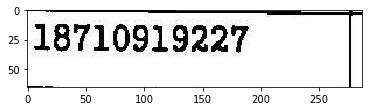

1188--888777-22110001191122011972222228777777--------------------- => 188721019120197287


In [6]:
show_result('1_17.jpg')

In [8]:
root = '/home/sherlock/Documents/express_recognition/data/validation/telephone'
img_path = os.path.join(root, '1_17.jpg')
transformer = dataset.resizeNormalize((128, 32))
image = Image.open(img_path).convert('L')
image = transformer(image).cuda()
image = image.view(1, *image.size())
image = Variable(image)

mynet.eval()
preds = mynet(image)

In [11]:
preds

Variable containing:
(0 ,.,.) = 

Columns 0 to 7 
   -3.7365  -6.2006  20.0192  -3.8738  -0.3932   1.3956   1.7396 -10.5642

Columns 8 to 10 
    1.0865   2.6876   0.6165

(1 ,.,.) = 

Columns 0 to 7 
   -5.0595  -4.8987  17.8799  -5.7379   1.2568   1.1966   1.1782  -8.4437

Columns 8 to 10 
    1.0808   6.8604  -0.8282

(2 ,.,.) = 

Columns 0 to 7 
   -5.2023  -1.4265   4.4800  -5.7612   3.8497  -0.2786  -3.7168  -2.0380

Columns 8 to 10 
    1.6398  15.7860  -1.8065

(3 ,.,.) = 

Columns 0 to 7 
   -0.7421   2.6945  -6.0203   1.4282   5.7540  -2.8126  -2.2334   1.3653

Columns 8 to 10 
   -2.4425   8.3288  -5.3261

(4 ,.,.) = 

Columns 0 to 7 
    7.8646   3.3631 -11.2221   3.9026   0.1923   0.6738   1.9764   2.4252

Columns 8 to 10 
   -3.4999  -2.3788  -9.0323

(5 ,.,.) = 

Columns 0 to 7 
    8.5162  -0.5459  -5.8660  -4.7421  -4.5175   4.0051   2.7821   3.0980

Columns 8 to 10 
   -1.4673   2.8628  -8.8237

(6 ,.,.) = 

Columns 0 to 7 
    1.2647  -0.1657   0.9416  -8.3951  -3.35

In [ ]:
all_file_name = os.listdir('/home/sherlock/Documents/express_recognition/data/validation/telephone/')

In [ ]:
for img in all_file_name:
    show_result(img)
    print()